In [9]:
%cd ~/NetBeansProjects/ExpLosion/
from notebooks.common_imports import *
import numpy as np
from itertools import tee
from gui.user_code import pairwise_randomised_significance, get_data_for_signif_test
from gui.output_utils import get_cv_fold_count, get_cv_scores_many_experiment

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


# Does the classification evaluation framework work?
What is the effect of adding uniform random noise to vectors? Can our experiments tell between a set of vectors and a corrupted version of the same vectors? To find out, add uniform random noise from $-n$ to $n$ (x axis) to all non-zero entries in a set of `word2vec` embeddings.
     

experiments are [114, 174, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
ids [114, 174, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99] names ['0.0', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0', '1.2', '1.4', '1.6', '1.8', '2.0']
Original difference 0.00780628566842
p-value 0.08999999999999997
Original difference 0.00746983336526
p-value 0.11599999999999999
Original difference 0.00868288322799
p-value 0.04200000000000004
Original difference 0.0132797037605
p-value 0.0
Original difference 0.0104066909277
p-value 0.030000000000000027
Original difference 0.0206218476665
p-value 0.0
Original difference 0.00434144161399
p-value 0.346
Original difference 0.0106620698461
p-value 0.014000000000000012
Original difference 0.00268147864394
p-value 0.532
Original difference 0.00951286471302
p-value 0.040000000000000036


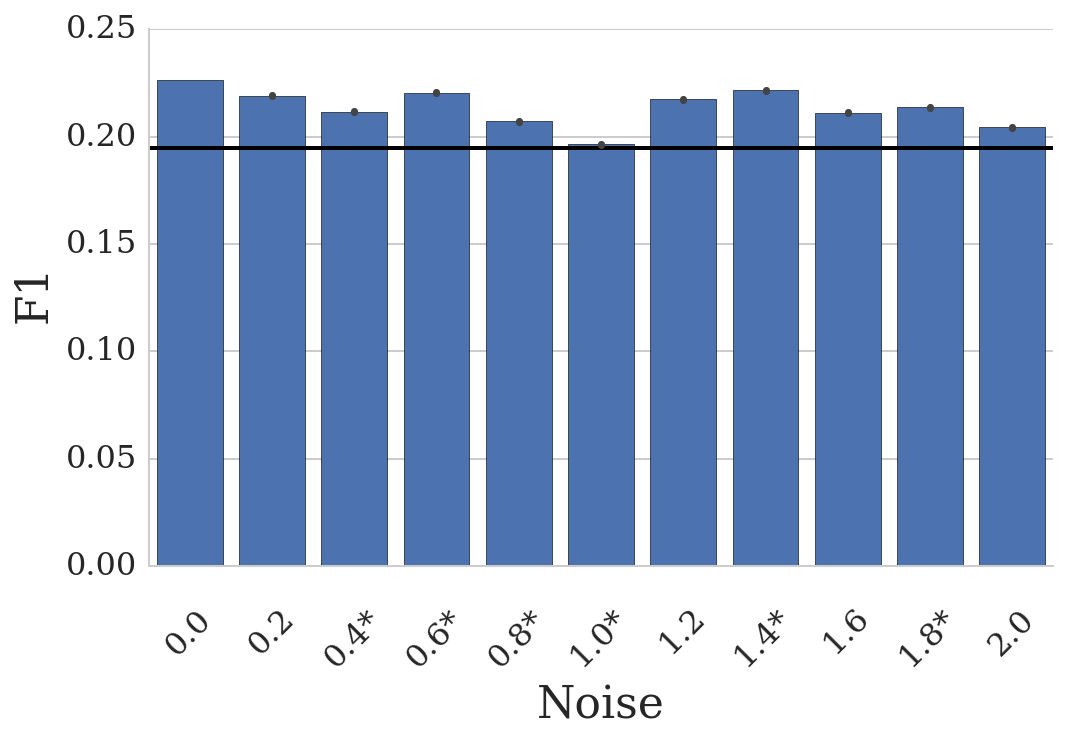

In [11]:
d = {'vectors__unlabelled_percentage': 100,
     'labelled': 'amazon_grouped-tagged',
     'vectors__dimensionality': 100.0,
     'decode_handler': 'SignifiedOnlyFeatureHandler',
     'vectors__composer': 'Add',
     'vectors__rep': 0, 
     'k': 3,
     'vectors__unlabelled': 'wiki',
     'vectors__algorithm': 'word2vec',
     'document_features_tr': 'J+N+AN+NN',
     'document_features_ev': 'AN+NN'}
e = Experiment.objects.filter(**d).order_by('noise').values_list('id', flat=True)
print('experiments are', e)

cv_folds = get_cv_fold_count(e)
scores, folds = get_cv_scores_many_experiment(e)
raw_names = ['%1.1f'%x for x in Experiment.objects.filter(id__in=e).order_by('noise').values_list('noise', flat=True)]

# calculate significance
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

print('ids', e, 'names', raw_names)
for i, (e1, e2) in enumerate(pairwise(e)):
    # TODO need bonferoni correction     
    statistic, pval = pairwise_randomised_significance(get_data_for_signif_test(e1),
                                            get_data_for_signif_test(e2))
    if pval < 0.05:
        # significant difference exists
        raw_names[i] += '*'

names = np.repeat(raw_names, cv_folds)
df = pd.DataFrame(dict(Noise=names, F1=scores, folds=folds))
ax = sns.factorplot('Noise', 'F1', data=df, kind='bar', aspect=1.5);
ax.set_xticklabels(rotation=45);

# random baseline for comparison
rand = Experiment.objects.get(vectors__algorithm='random_vect', labelled='amazon_grouped-tagged').id
score, score_std = Results.objects.get(id=rand, 
                                          classifier='MultinomialNB').get_performance_info('macrof1')
plt.hlines(score, -100, 100)
plt.savefig('plot-noise-gigaword-add.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [14]:
Results.objects.get(id=114, classifier='MultinomialNB').accuracy_mean

0.2256911191981102

In [15]:
Results.objects.get(id=99, classifier='MultinomialNB').accuracy_mean

0.20417544531698908

In [28]:
d = {'vectors__unlabelled_percentage__in': [15, 50, 100],
#      'labelled': 'amazon_grouped-tagged',
#      'vectors__dimensionality': 100.0,
     'decode_handler': 'SignifiedOnlyFeatureHandler',
     'vectors__composer': 'Add',
     'vectors__rep': 0, 
     'k': 3,
     'vectors__unlabelled__in': ['wiki', 'gigaw'],
     'vectors__algorithm': 'word2vec',
     'document_features_tr': 'J+N+AN+NN',
     'document_features_ev': 'AN+NN'}
ids=Experiment.objects.filter(**d).values_list('id', flat=True)
[x.accuracy_mean for x in Results.objects.filter(id__in=ids)]

[0.34668721109399075,
 0.21931176168464306,
 0.3475952929137887,
 0.2209004860578153,
 0.3475788935735276,
 0.2081896001022103,
 0.34737917384919875,
 0.21917895677711804,
 0.34737917384919875,
 0.21170912341186235,
 0.3476983974972866,
 0.22039200663985187,
 0.34737917384919875,
 0.2071123028793973,
 0.3474430185788163,
 0.1967056119517334,
 0.3473153291195812,
 0.2173274596182085,
 0.3478899316861393,
 0.22166890123220329,
 0.34718763966034605,
 0.21100683138606907,
 0.3478260869565217,
 0.21368831003000704,
 0.34680457128264064,
 0.20417544531698908,
 0.34737917384919875,
 0.2256911191981102,
 0.3474733277965885,
 0.2269852424455376]